In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

In [7]:
# to ccheck if GPU is actually used for execution (mainly for model trraining and stuff)
tf.debugging.set_log_device_placement(True)

In [18]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()
# The train set (x_train) contains 60k images each of it is a matrix of size 28*28
# Each image is 28x28 pixels
# Each pixel ranges from 0 to 255
# Test set has 10k images

60000
10000
(28, 28)


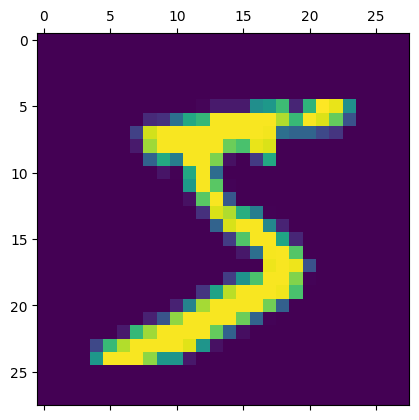

In [26]:
print(len(x_train))
print(len(x_test))
print(x_train[0].shape)
plt.matshow(x_train[0])

In [33]:
# Now we normalize the dataset to make calculations fast and accurate.
# NN expects a flat 1D input, so flatten the 2D 28x28 image into 784-lenght vectors
x_train = x_train/255
x_test = x_test/255

# Flatten the dataset
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)

In [29]:
x_train.shape

(60000, 28, 28)

In [48]:
x_train_flatten.shape

(60000, 784)

## Build a Neural Network

In [ ]:
# NN with a sinlge layer perceptron. One input layer and one output layer, no hidden layer
# 10 output neurons (one for each digit from 0 to 9)
# input_shape = 784 matches the flattened image shape
# uses sigmoid activation function as it returns probabilites b/w 0 and 1
# Dense Layer (Output Layer)
    # Dense(10) → this is the only trainable layer (i.e., with weights).
    # It has:
        # 784 weights per neuron × 10 neurons = 7,840 weights
        # 10 biases (1 per neuron)
        # Activation: sigmoid applied to each output neuron.

In [49]:
# VERY IMP
# weights adjusted not using the basic perceptron learning rule — 
# instead, we are using gradient-based optimization (Adam + cross-entropy).
# Weights adjusted using backpropogation, not classic perceptron rul

In [ ]:
# Sequential groups a linear stack of layers into a Model.
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,), activation='sigmoid')
])
# .compile configures the model for training.
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

model.fit(x_train_flatten, y_train, epochs = 50)

In [24]:
type(model)

keras.src.models.sequential.Sequential

## Model Evaluation

In [38]:
loss, accuracy= model.evaluate(x_test_flatten, y_test)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Pr

2025-06-03 16:31:38.940002: I tensorflow/core/common_runtime/placer.cc:125] start: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-06-03 16:31:38.940030: I tensorflow/core/common_runtime/placer.cc:125] stop: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-06-03 16:31:38.940034: I tensorflow/core/common_runtime/placer.cc:125] step: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-06-03 16:31:38.940042: I tensorflow/core/common_runtime/placer.cc:125] RangeDataset: (RangeDataset): /job:localhost/replica:0/task:0/device:CPU:0
2025-06-03 16:31:38.940047: I tensorflow/core/common_runtime/placer.cc:125] handle_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2025-06-03 16:31:38.950500: I tensorflow/core/common_runtime/placer.cc:125] input__dataset: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-06-03 16:31:38.950532: I tensorflow/core/common_runtime/placer.cc:125] MapDataset: (MapDataset): /job:localhost/replica:0/task:0/device:CPU:0
2025

Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_multi_step_on_iterator_440775 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_multi_step_on_iterator_440775 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_multi_step_on_iterator_440775 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/dev

2025-06-03 16:31:40.232186: I tensorflow/core/common_runtime/placer.cc:125] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-06-03 16:31:40.232197: I tensorflow/core/common_runtime/placer.cc:125] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2025-06-03 16:31:40.232200: I tensorflow/core/common_runtime/placer.cc:125] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2025-06-03 16:31:40.232202: I tensorflow/core/common_runtime/placer.cc:125] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2025-06-03 16:31:40.232204: I tensorflow/core/common_runtime/placer.cc:125] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2025-06-03 16:31:40.232206: I tensorflow/core/common_runtime/placer.cc:125] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2025-06-03 16:31:40.232208: I tensorflow/core/common_runtime/placer.cc:125] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2025-

In [41]:
print(f"Loss is {loss} and accurcacy is {accuracy}")

Loss is 0.27943700551986694 and accurcacy is 0.9273999929428101


In [53]:
single_input = x_test[80]         # shape: (28, 28)
flattened_input = single_input.reshape(1, 784)  # reshape to (1, 784)

# Normalize if your training data was normalized (e.g. /255)
flattened_input = flattened_input / 255.0

# Predict probabilities
pred_probs = model.predict(flattened_input)  # shape: (1, 10)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

2025-06-03 16:36:00.184135: I tensorflow/core/common_runtime/placer.cc:125] start: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-06-03 16:36:00.184158: I tensorflow/core/common_runtime/placer.cc:125] stop: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-06-03 16:36:00.184191: I tensorflow/core/common_runtime/placer.cc:125] step: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-06-03 16:36:00.184208: I tensorflow/core/common_runtime/placer.cc:125] RangeDataset: (RangeDataset): /job:localhost/replica:0/task:0/device:CPU:0
2025-06-03 16:36:00.184216: I tensorflow/core/common_runtime/placer.cc:125] handle_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2025-06-03 16:36:00.192427: I tensorflow/core/common_runtime/placer.cc:125] input__dataset: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-06-03 16:36:00.192445: I tensorflow/core/common_runtime/placer.cc:125] MapDataset: (MapDataset): /job:localhost/replica:0/task:0/device:CPU:0
2025

In [50]:
flattened_input.shape

(1, 784)

In [54]:
(pred_probs)

array([[0.27378905, 0.76823777, 0.5394692 , 0.33048594, 0.5762419 ,
        0.8896695 , 0.36468443, 0.7750899 , 0.09410735, 0.36592767]],
      dtype=float32)

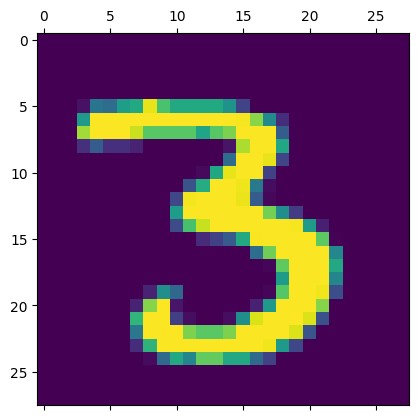

In [48]:
plt.matshow(x_train[12])